In [1]:
import pandas as pd
import time
import os
import keras
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential, save_model, load_model

import matplotlib
import matplotlib.pyplot as plt
import itertools

import tensorflow as tf
from tensorflow.keras import regularizers

import seaborn as sns

from sklearn.model_selection import KFold
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [2]:

# Useful Constants

# Output classes to learn how to classify
LABELS = [
    "arching_back",
    "head_banging",
    "kicking_legs",
    "rubbing_eye",
    "stretching",
    "sucking_fingers"
]

DATASET_PATH = "C:\\Users\\Yurtsever\\Downloads\\baby_pose_data\\"

X_train_path = DATASET_PATH + "X_train.txt"
X_test_path = DATASET_PATH + "X_test.txt"

y_train_path = DATASET_PATH + "Y_train.txt"
y_test_path = DATASET_PATH + "Y_test.txt"

n_steps = 20 # 20 timesteps per series

In [3]:
# Load the networks inputs

def load_X(X_path):
    file = open(X_path, 'r')
    X_ = np.array(
        [elem for elem in [
            row.split(',') for row in file
        ]], 
        dtype=np.float32
    )
    file.close()
    #blocks = int(len(X_) / n_steps)
    
    #X_ = np.array(np.split(X_,blocks))

    return X_ 

# Load the networks outputs

def load_y(y_path):
    file = open(y_path, 'r')
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]], 
        dtype=np.int32
    )
    file.close()
    
    # for 0-based indexing 
    return y_ - 1

X_train = load_X(X_train_path)
X_test = load_X(X_test_path)
#print X_test

y_train = load_y(y_train_path)
y_test = load_y(y_test_path)
# proof that it actually works for the skeptical: replace labelled classes with random classes to train on
#for i in range(len(y_train)):
#    y_train[i] = randint(0, 5)

In [4]:
print(X_train)

[[303.2619   102.33573  338.6219   ... 423.5969   617.1272   462.33392 ]
 [303.49222   99.553314 336.49457  ... 419.45676  631.07733  465.9891  ]
 [304.26126   96.056915 338.50433  ... 419.87106  632.8453   465.63574 ]
 ...
 [654.3234   200.56686  653.0906   ... 570.97345  536.0604   570.05743 ]
 [653.5099   197.2023   652.8083   ... 564.72406  542.0281   565.2645  ]
 [652.4953   198.54887  652.7971   ... 555.3494   538.20087  558.42725 ]]


In [5]:
X_train.shape

(35300, 34)

In [6]:
#scaler = MinMaxScaler()
#X_train = scalar.fit_transform(X_train)
#X_test = scalar.fit_transform(X_test)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
print(X_train)

[[0.24478087 0.15667385 0.26863053 ... 0.5278704  0.47318593 0.5862573 ]
 [0.24496678 0.15223597 0.26692384 ... 0.5218343  0.48375502 0.5915217 ]
 [0.24558751 0.1466593  0.26853624 ... 0.52243835 0.4850945  0.5910128 ]
 ...
 [0.5281437  0.31335017 0.52092123 ... 0.74273914 0.41176683 0.7414082 ]
 [0.52748704 0.3079838  0.5206948  ... 0.7336278  0.41628814 0.7345051 ]
 [0.5266681  0.31013155 0.5206858  ... 0.71996    0.4133885  0.7246576 ]]


In [8]:
X_train.shape

(35300, 34)

In [9]:
print(y_test)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]


## Block creation

In [10]:
blocks = int(len(X_train) / 20)
X_train = np.array(np.split(X_train, blocks))
X_train.shape

(1765, 20, 34)

In [11]:
blocks = int(len(X_test) / 20)
X_test = np.array(np.split(X_test, blocks))
X_test.shape

(718, 20, 34)

In [12]:
y_train.shape

(1765, 1)

In [13]:
X_train.shape

(1765, 20, 34)

In [15]:
print(X_train)

[[[0.24478087 0.15667385 0.26863053 ... 0.5278704  0.47318593 0.5862573 ]
  [0.24496678 0.15223597 0.26692384 ... 0.5218343  0.48375502 0.5915217 ]
  [0.24558751 0.1466593  0.26853624 ... 0.52243835 0.4850945  0.5910128 ]
  ...
  [0.23757301 0.11612284 0.24224438 ... 0.4915353  0.49936888 0.6108134 ]
  [0.21120262 0.15938316 0.21304366 ... 0.49987078 0.49915504 0.609101  ]
  [0.21320917 0.10643282 0.21675958 ... 0.44230223 0.4732206  0.60421336]]

 [[0.2557995  0.08949336 0.28876334 ... 0.54330164 0.5121734  0.6034543 ]
  [0.25518766 0.08077976 0.27939886 ... 0.5560103  0.5141186  0.6162516 ]
  [0.26025802 0.06442594 0.2864186  ... 0.55146205 0.5202026  0.6117031 ]
  ...
  [0.17858939 0.14945357 0.22005697 ... 0.54259825 0.5442337  0.3290218 ]
  [0.204767   0.14415327 0.2111811  ... 0.31700873 0.42613956 0.5736521 ]
  [0.20497723 0.14354834 0.22013475 ... 0.27035284 0.3994929  0.52455044]]

 [[0.21320917 0.10643282 0.21675958 ... 0.44230223 0.4732206  0.60421336]
  [0.2029042  0.136496

In [16]:
label_encoder = LabelEncoder()
Y_train = np.array(y_train)
Y_train = label_encoder.fit_transform(y_train)

C:\Users\Yurtsever\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [17]:
print(Y_train)

[0 0 0 ... 5 5 5]


In [18]:
label_encoder.classes_

array([0, 1, 2, 3, 4, 5])

In [19]:
Y_train = to_categorical(Y_train)

In [20]:
y_test = to_categorical(y_test)

In [21]:
print(Y_train)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [22]:
# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((Y_train, y_test), axis=0)

In [24]:
#K-FOLD MODEL

num_folds = 10

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

input_shape = (20, 34)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

In [25]:
# K-fold Cross Validation model evaluation
fold_no = 1
best_fold = 1.5

for train, test in kfold.split(inputs, targets):
    
  # Define the model architecture
    model = Sequential()
    model.add(LSTM(16, input_shape=(20, 34), dropout=0.2, recurrent_dropout=0.2, return_sequences=True, kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001))) # input_shape=(20, 50)
    model.add(LSTM(32, input_shape=(20, 34), dropout=0.2, recurrent_dropout=0.2, return_sequences=True, kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))
    model.add(LSTM(16, input_shape=(20, 34), dropout=0.2, recurrent_dropout=0.2, return_sequences=False, kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))
    model.add(Dense(32, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(Dense(32, activation='sigmoid'))
    #model.add(Dense(32))
    #model.add(Dense(32))
    model.add(Dense(6, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    
    # Define callbacks
    #checkpoint_path = f'./fold_models/{fold_no}'
    #os.mkdir(checkpoint_path)
    
    #keras_callbacks = [
    #ModelCheckpoint(checkpoint_path, monitor='accuracy', save_best_only=True, mode='min')
    #]

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=16,
              epochs=40,
              verbose=1)
    
    filepath = f'./fold_models_new/{fold_no}.h5'
    save_model(model, filepath, save_format='h5')

    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
    # take the fold history that has the best loss for our model 
    if (scores[0] < best_fold):
        best_fold_history = history

    # Increase fold number
    fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
    
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/40
140/140 [==============================] - 9s 19ms/step - loss: 1.8850 - accuracy: 0.2455
Epoch 2/40
140/140 [==============================] - 3s 19ms/step - loss: 1.6989 - accuracy: 0.3140
Epoch 3/40
140/140 [==============================] - 3s 19ms/step - loss: 1.5219 - accuracy: 0.4167
Epoch 4/40
140/140 [==============================] - 3s 19ms/step - loss: 1.3930 - accuracy: 0.5107
Epoch 5/40
140/140 [==============================] - 3s 19ms/step - loss: 1.3102 - accuracy: 0.5269
Epoch 6/40
140/140 [==============================] - 3s 19ms/step - loss: 1.2776 - accuracy: 0.5319
Epoch 7/40
140/140 [==============================] - 3s 19ms/step - loss: 1.1940 - accuracy: 0.5796
Epoch 8/40
140/140 [==============================] - 3s 19ms/step - loss: 1.1648 - accuracy: 0.5691
Epoch 9/40
140/140 [==============================] - 3s 19ms/step - loss: 1.1217 - accuracy: 0

dict_keys(['loss', 'accuracy'])


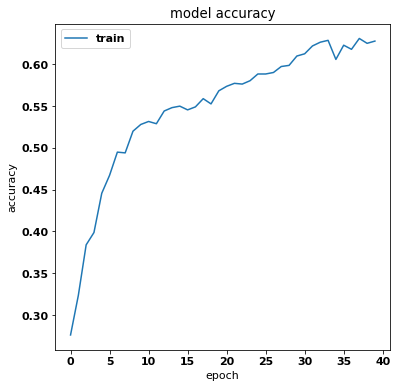

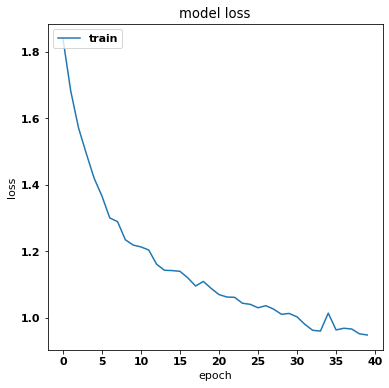

In [26]:
# (Inline plots: )

font = {
    'weight' : 'bold',
    'size'   : 11
}
matplotlib.rc('font', **font)

width = 6
height = 6
plt.figure(figsize=(width, height))


print(best_fold_history.history.keys())
# summarize history for accuracy
plt.plot(best_fold_history.history['accuracy'])
#plt.plot(best_fold_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

font = {
    'weight' : 'bold',
    'size'   : 11
}
matplotlib.rc('font', **font)

width = 6
height = 6
plt.figure(figsize=(width, height))


# summarize history for loss
plt.plot(best_fold_history.history['loss'])
#plt.plot(best_fold_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
y_true = y_test
y_pred = model.predict_classes(X_test)

classes=["arching_back", "head_banging", "kicking_legs", "rubbing_eye", "stretching", "sucking_fingers"]

C:\Users\Yurtsever\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


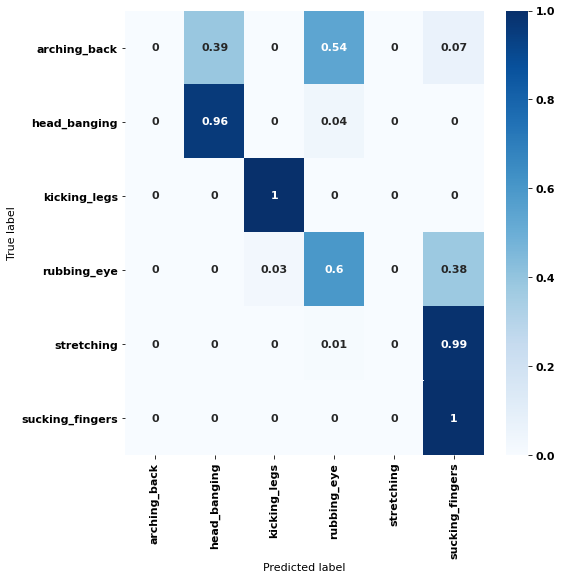

In [28]:
con_mat = tf.math.confusion_matrix(labels=y_true.argmax(axis=1), predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [29]:
#load selected model...
# FOLD 5

loaded_model = load_model('./fold_models_new/5.h5')

loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 20, 16)            3264      
_________________________________________________________________
lstm_13 (LSTM)               (None, 20, 32)            6272      
_________________________________________________________________
lstm_14 (LSTM)               (None, 16)                3136      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 6)                

In [30]:
# Fit again after selecting best model (fit without train_test split)

# Define callbacks
checkpoint_path = './best_model_new'
os.mkdir(checkpoint_path)

keras_callbacks = [
ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1),
EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
]

# fit final model.
history = loaded_model.fit(X_train, Y_train, validation_data=(X_test, y_test), epochs=40, batch_size=16, callbacks=keras_callbacks)

Epoch 1/40
111/111 [==============================] - 8s 33ms/step - loss: 0.7336 - accuracy: 0.7654 - val_loss: 0.4892 - val_accuracy: 0.8593

Epoch 00001: val_loss improved from inf to 0.48916, saving model to .\best_model_new
INFO:tensorflow:Assets written to: .\best_model_new\assets
Epoch 2/40
111/111 [==============================] - 2s 21ms/step - loss: 0.6930 - accuracy: 0.7841 - val_loss: 0.4092 - val_accuracy: 0.8969

Epoch 00002: val_loss improved from 0.48916 to 0.40922, saving model to .\best_model_new
INFO:tensorflow:Assets written to: .\best_model_new\assets
Epoch 3/40
111/111 [==============================] - 2s 21ms/step - loss: 0.6686 - accuracy: 0.8023 - val_loss: 0.3614 - val_accuracy: 0.9220

Epoch 00003: val_loss improved from 0.40922 to 0.36144, saving model to .\best_model_new
INFO:tensorflow:Assets written to: .\best_model_new\assets
Epoch 4/40
111/111 [==============================] - 2s 21ms/step - loss: 0.6390 - accuracy: 0.8102 - val_loss: 0.4175 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


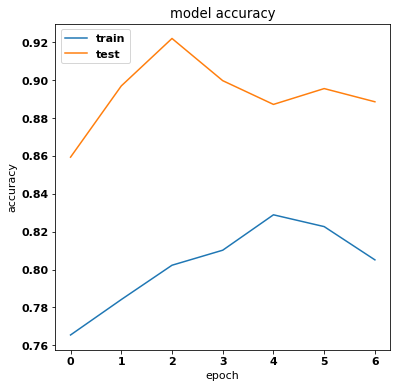

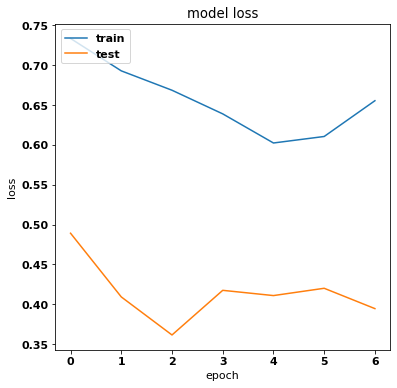

In [31]:
# (Inline plots: )

font = {
    'weight' : 'bold',
    'size'   : 11
}
matplotlib.rc('font', **font)

width = 6
height = 6
plt.figure(figsize=(width, height))


print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

font = {
    'weight' : 'bold',
    'size'   : 11
}
matplotlib.rc('font', **font)

width = 6
height = 6
plt.figure(figsize=(width, height))


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
y_true = y_test
y_pred = loaded_model.predict_classes(X_test)

classes=["arching_back", "head_banging", "kicking_legs", "rubbing_eye", "stretching", "sucking_fingers"]
#classes=["head_banging", "kicking_legs", "rubbing_eye", "stretching", "sucking_fingers"]

C:\Users\Yurtsever\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


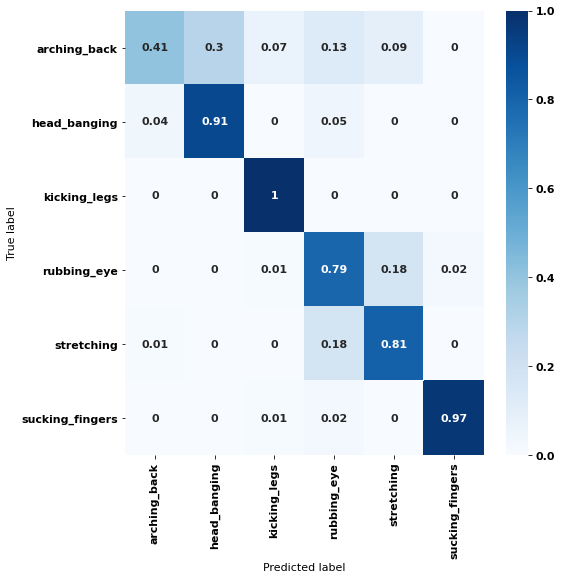

In [33]:
con_mat = tf.math.confusion_matrix(labels=y_true.argmax(axis=1), predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [34]:
y_pred = model.predict(X_test)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), np.rint(y_pred.argmax(axis=1)))

In [35]:
print(confusion_matrix)

[[  0  18   0  25   0   3]
 [  0  74   0   3   0   0]
 [  0   0 126   0   0   0]
 [  0   0   3  67   0  42]
 [  0   0   0   1   0  77]
 [  0   0   0   0   0 279]]


In [36]:
print(y_test)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]
